In [1]:
import os
import pandas as pd 
from collections import Counter, defaultdict
from tqdm import tqdm

path_work = "/media/concha-eloko/Linux/PPT_clean"
path_seqbased = "/media/concha-eloko/Linux/PPT_clean/Seqbased_model"


In [3]:
DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df_v2.filtered.tsv", sep = "\t" ,  header = 0)
#DF_info_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]
#DF_info_lvl_0 = DF_info_lvl_0.drop_duplicates(subset = ["Infected_ancestor","index","prophage_id"] , keep = "first").reset_index(drop=True)

DF_info_lvl_0 = DF_info.copy()
df_prophages = DF_info_lvl_0.drop_duplicates(subset = ["Phage"])
dico_prophage_count = dict(Counter(df_prophages["KL_type_LCA"]))

KLtypes = [kltype for kltype in dico_prophage_count if dico_prophage_count[kltype] >= 20]

In [6]:
df_coeff = pd.read_csv(f"{path_work}/attention_weights_dpos.0802.raw.tsv" , sep = "\t", header= 0)
df_coeff = df_coeff.drop_duplicates(subset = ["KL_type", "domain seq"])
df_coeff = df_coeff[(df_coeff["attention_coefficient"] > 0.5) & (df_coeff["probability"] > 0.8)]


In [16]:
#tropiseq_labeled_seq = pd.read_csv(f"{path_seqbased}/labeling_depo_clusters.chi2.0804.tsv", sep = "\t", header = 0)
tropiseq_labeled_seq = pd.read_csv(f"{path_seqbased}/labeling_depo_clusters.pred.0904.tsv", sep = "\t", header = 0).fillna(0)

tropiseq_labeled_seq_annot = tropiseq_labeled_seq[tropiseq_labeled_seq["TropiSeq_KL_types"] != 0]
tropiseq_labeled_seq

,index,seq,domain_seq,depo_cluster,TropiSeq_KL_types,TropiSeq_scores
0,minibatch__460,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,Dpo_cdhit_89,0,0
1,minibatch__1084,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,Dpo_cdhit_12,0,0
2,minibatch__1741,MAFNPELGSSSPEVLLDNAKRLDELTNGPAATVPDRAGEPLDSWRK...,ELGSSSPEVLLDNAKRLDELTNGPAATVPDRAGEPLDSWRKMQEDN...,Dpo_cdhit_147,0,0
3,minibatch__467,MNRSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEK...,RSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEKDV...,Dpo_cdhit_233,KL19,KL19 : 0.5020466042963604
4,minibatch__15,MYHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNT...,YHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNTV...,Dpo_cdhit_280,KL25,KL25 : 0.5113381278515909
...,...,...,...,...,...,...
3912,anubis_return__4216,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,Dpo_cdhit_226,"KL46,KL149","KL46 : 0.9163233501874942,KL149 : 0.6497543628..."
3913,anubis_return__4239,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,Dpo_cdhit_689,"KL51,KL141,KL117","KL51 : 0.6835463433012764,KL141 : 0.5468976663..."
3914,anubis_return__4260,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,Dpo_cdhit_778,KL57,KL57 : 0.9884944684944685
3915,anubis_return__4275,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,Dpo_cdhit_918,KL9,KL9 : 0.697289307294887


In [20]:
tropiseq_labeled_seq_annot

kltypes_tropiseq = set()
for _, row in tropiseq_labeled_seq_annot.iterrows():
    kl_list = row["TropiSeq_KL_types"].split(",")
    kltypes_tropiseq.update(kl_list)
    
len(kltypes_tropiseq)

96

In [73]:
def tuple_list_to_string(tuple_list):
    result = ';'.join(','.join(map(str, tpl)) for tpl in tuple_list)
    return result
    
with open(f"{path_work}/labeling_depo_clusters.PPT.0904.tsv", "w") as outfile :
    outfile.write(f"index\tseq\tdomain_seq\tdepo_cluster\tTropiseq_KLtypes\tTropiseq_scores\tTropiGAT_KLtypes\tTropiGAT_scores\n")
    for _,row in tropiseq_labeled_seq.iterrows() :
        # General info :
        general_info = f"{row['index']}\t{row['seq']}\t{row['domain_seq']}\t{row['depo_cluster']}\t"
        outfile.write(general_info)
        # TropiSeq data :
        tropiseq_data = f"{row['TropiSeq_KL_types']}\t{row['TropiSeq_scores']}\t"
        outfile.write(tropiseq_data)
        # TropiGAT data : 
        if row["seq"] in df_coeff["seq"].tolist(): 
            df_seq = df_coeff[df_coeff["seq"] == row["seq"]].drop_duplicates(subset = ["KL_type"])
            hits = list(zip(df_seq["KL_type"], df_seq["attention_coefficient"],df_seq["probability"]))
            # write hits :
            outfile.write(f"{','.join(df_seq['KL_type'])}\t")
            # write score :
            #scores = ";".join(hits)
            scores = tuple_list_to_string(hits)
            outfile.write(f"{scores}\n")
        else :
            outfile.write(f"NaN\tNaN\n")


In [14]:
#final_annotation = pd.read_csv(f"{path_work}/labeling_depo_clusters.PPT.0804.tsv", sep = "\t", header = 0)
#final_annotation

In [4]:
final_annotation = pd.read_csv(f"{path_work}/labeling_depo_clusters.PPT.0904.tsv", sep = "\t", header = 0)
final_annotation.fillna("0", inplace=True)  # Fill NaN values with "0" inplace


In [5]:
final_annotation_pertinent = final_annotation[(final_annotation["Tropiseq_KLtypes"] != "0") | (final_annotation["TropiGAT_KLtypes"] != "0")]

> Get the number of associations commons for both models : 

In [6]:
final_annotation_pertinent = final_annotation_pertinent.drop_duplicates(subset = ["domain_seq"])
final_annotation_pertinent

,index,seq,domain_seq,depo_cluster,Tropiseq_KLtypes,Tropiseq_scores,TropiGAT_KLtypes,TropiGAT_scores
3,minibatch__467,MNRSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEK...,RSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEKDV...,Dpo_cdhit_233,KL19,KL19 : 0.5020466042963604,KL19,"KL19,1.0,0.9360229969024658"
4,minibatch__15,MYHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNT...,YHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNTV...,Dpo_cdhit_280,KL25,KL25 : 0.5113381278515909,KL25,"KL25,1.0,0.9969082474708556"
6,minibatch__1900,MSTYKTKNPLGSAAVKDLYDNAENVDKFVNDRTKEELEDRLGVLRK...,STYKTKNPLGSAAVKDLYDNAENVDKFVNDRTKEELEDRLGVLRKT...,Dpo_cdhit_32,KL123,KL123 : 0.5939826590887848,0,0
7,minibatch__91,MQYLYVDPSDDENKPIPSAFKTVTAAIAAITSYPFSILIRRGTILK...,MQYLYVDPSDDENKPIPSAFKTVTAAIAAITSYPFSILIRRGTILK...,Dpo_cdhit_182,KL15,KL15 : 0.7938890377524203,KL15,"KL15,1.0,0.9968655705451964"
8,minibatch__840,MTITETQKTAQLAADAAVSAAEAKQYMLEAEKGYQDTSAAAQQAQD...,TETQKTAQLAADAAVSAAEAKQYMLEAEKGYQDTSAAAQQAQDAAG...,Dpo_cdhit_453,KL16,KL16 : 0.5752871838710885,0,0
...,...,...,...,...,...,...,...,...
3912,anubis_return__4216,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,Dpo_cdhit_226,"KL46,KL149","KL46 : 0.9163233501874942,KL149 : 0.6497543628...",KL149,"KL149,1.0,0.8127290606498718"
3913,anubis_return__4239,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,Dpo_cdhit_689,"KL51,KL141,KL117","KL51 : 0.6835463433012764,KL141 : 0.5468976663...",0,0
3914,anubis_return__4260,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,Dpo_cdhit_778,KL57,KL57 : 0.9884944684944685,0,0
3915,anubis_return__4275,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,Dpo_cdhit_918,KL9,KL9 : 0.697289307294887,KL9,"KL9,1.0,0.954328954219818"


In [7]:
tropigat_predicted_kltypes = [kltypes for _, row in final_annotation_pertinent.iterrows() for kltypes in row["TropiGAT_KLtypes"].split(",") if kltypes != "0"]
tropiseq_predicted_kltypes = [kltypes for _, row in final_annotation_pertinent.iterrows() for kltypes in row["Tropiseq_KLtypes"].split(",") if kltypes != "0"]
kltypes = set(tropigat_predicted_kltypes + tropiseq_predicted_kltypes)

In [8]:
from collections import defaultdict

common_associations = defaultdict(list)
all_associations = set()


for _,row in final_annotation_pertinent.iterrows() : 
    tropigat_kl = set(row["TropiGAT_KLtypes"].split(","))
    tropiseq_kl = set(row["Tropiseq_KLtypes"].split(","))
    depo_kl = tropigat_kl.union(tropiseq_kl)
    if "0" in depo_kl :
        for kltype in depo_kl :
            if kltype != "0" : 
                all_associations.update((row["domain_seq"], kltype))
    else :
        tmp_common = tropigat_kl | tropiseq_kl
        if len(tmp_common) == 0 : 
            all_associations.update(depo_kl)
        else :
            for kltype in tmp_common :
                common_associations[kltype].append(row["domain_seq"])
            for kltype in depo_kl : 
                all_associations.update((row["domain_seq"], kltype))

In [9]:
DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df_v2.filtered.tsv", sep = "\t" ,  header = 0)
DF_info_lvl_0 = DF_info.copy()
df_prophages = DF_info_lvl_0.drop_duplicates(subset = ["Phage"])
dico_prophage_count = dict(Counter(df_prophages["KL_type_LCA"]))

In [10]:
dico_count_depolymerase = {kltype : len(common_associations[kltype]) for kltype in common_associations}
dico_n_depolymerase_cluster = {}
dico_n_depolymerase_cluster_detail = {}

for kltype in common_associations :
    tmp_dpo_cluster = []
    indice_depo = []
    for seq in common_associations[kltype] :
        depo_cluster = final_annotation_pertinent[final_annotation_pertinent["domain_seq"] == seq]["depo_cluster"].values.tolist()[0]
        depo_index = final_annotation_pertinent[final_annotation_pertinent["domain_seq"] == seq]["index"].values.tolist()[0]
        tmp_dpo_cluster.append(depo_cluster)
        indice_depo.append(depo_index)
    dico_n_depolymerase_cluster[kltype] = len(set(tmp_dpo_cluster))
    dico_n_depolymerase_cluster_detail[kltype] = {"depo_clusters" : tmp_dpo_cluster, "depo_indices" : indice_depo}
    


> Make input data for plots : 

In [11]:
count_n_depo = []
count_n_prophages = []
count_n_clusters = []

dico_full_data = {}

for kltype in common_associations :
    count_n_depo.append(dico_count_depolymerase[kltype])
    count_n_prophages.append(dico_prophage_count[kltype])
    count_n_clusters.append(dico_n_depolymerase_cluster[kltype])
    a = {"n_prophages" : dico_prophage_count[kltype], 
         "n_depo" : dico_count_depolymerase[kltype],
         "n_depo_clustes" : dico_n_depolymerase_cluster[kltype]}
    dico_full_data[kltype] = a

In [64]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 100, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 

clean_print(dico_full_data)

{'KL1': {'n_depo': 10, 'n_depo_clustes': 6, 'n_prophages': 190},
 'KL10': {'n_depo': 44, 'n_depo_clustes': 14, 'n_prophages': 111},
 'KL102': {'n_depo': 84, 'n_depo_clustes': 11, 'n_prophages': 242},
 'KL103': {'n_depo': 81, 'n_depo_clustes': 3, 'n_prophages': 13},
 'KL105': {'n_depo': 121, 'n_depo_clustes': 13, 'n_prophages': 114},
 'KL106': {'n_depo': 116, 'n_depo_clustes': 15, 'n_prophages': 487},
 'KL107': {'n_depo': 130, 'n_depo_clustes': 20, 'n_prophages': 1121},
 'KL108': {'n_depo': 112, 'n_depo_clustes': 8, 'n_prophages': 30},
 'KL109': {'n_depo': 11, 'n_depo_clustes': 3, 'n_prophages': 16},
 'KL11': {'n_depo': 12, 'n_depo_clustes': 4, 'n_prophages': 6},
 'KL110': {'n_depo': 59, 'n_depo_clustes': 16, 'n_prophages': 64},
 'KL111': {'n_depo': 52, 'n_depo_clustes': 4, 'n_prophages': 67},
 'KL112': {'n_depo': 15, 'n_depo_clustes': 7, 'n_prophages': 60},
 'KL113': {'n_depo': 15, 'n_depo_clustes': 3, 'n_prophages': 5},
 'KL114': {'n_depo': 27, 'n_depo_clustes': 9, 'n_prophages': 24},

In [65]:
for kltype, data in dico_full_data.items() :
    if data["n_prophages"] < 200 and data["n_depo_clustes"] > 20 :
        print(kltype , data)

KL46 {'n_prophages': 80, 'n_depo': 74, 'n_depo_clustes': 22}
KL30 {'n_prophages': 93, 'n_depo': 92, 'n_depo_clustes': 25}


> Plot number prophages vs number of depolymerases

Correlation coefficient (Pearson): 0.6801481960360505
P-value: 3.4478562663108464e-14


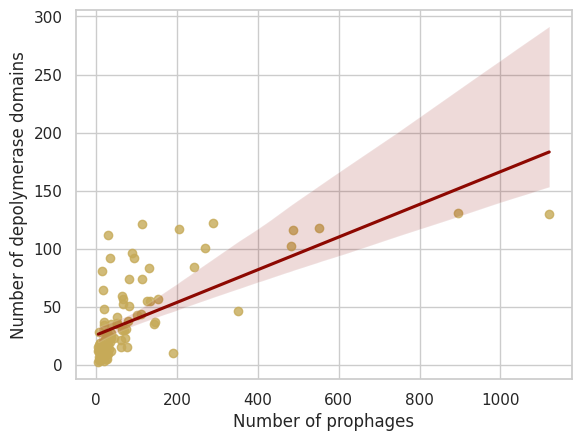

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df = pd.DataFrame({'Number of prophages': count_n_prophages, 'Number of depolymerase domains': count_n_depo})

# Set custom colors
scatter_color = "#c6aa58ff"
line_color = '#8d0801'

# Plot the scatter plot with regression line
scatter = sns.regplot(x='Number of prophages', y='Number of depolymerase domains', data=df, scatter_kws={'color': scatter_color}, line_kws={'color': line_color})

# Calculate and display correlation coefficient and p-value
correlation_coef, p_value = pearsonr(count_n_prophages, count_n_depo)
print("Correlation coefficient (Pearson):", correlation_coef)
print("P-value:", p_value)

# Add labels and title
plt.xlabel('Number of prophages')
plt.ylabel('Number of depolymerase domains')


# Show the plot
plt.savefig("/media/concha-eloko/Linux/papers/PPT/figures_draft/number_prophages_n_depo.svg")

plt.show()

Correlation coefficient (Pearson): 0.6006527613108893
P-value: 1.2381432391577132e-10


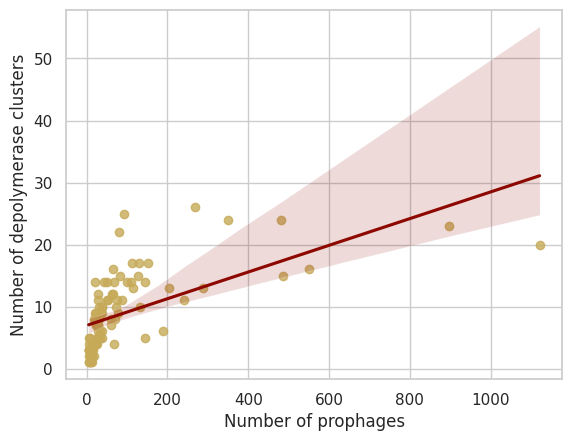

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Set custom colors
scatter_color = "#c6aa58ff"
line_color = '#8d0801'

# Create a DataFrame from the coordinates
df = pd.DataFrame({'Number of prophages': count_n_prophages, 'Number of depolymerase clusters': count_n_clusters})

# Plot the scatter plot with regression line
scatter = sns.regplot(x='Number of prophages', y='Number of depolymerase clusters', data=df, scatter_kws={'color': scatter_color}, line_kws={'color': line_color})

# Calculate and display correlation coefficient and p-value
correlation_coef, p_value = pearsonr(count_n_prophages, count_n_clusters)
print("Correlation coefficient (Pearson):", correlation_coef)
print("P-value:", p_value)

# Add labels and title
plt.xlabel('Number of prophages')
plt.ylabel('Number of depolymerase clusters')

# Show the plot
plt.savefig('/media/concha-eloko/Linux/papers/PPT/figures_draft/labeling.prophages_n_depo_cluster.svg', dpi = 500)
plt.show()

Correlation coefficient (Pearson): 0.7090983833265859
P-value: 8.897696357546787e-16


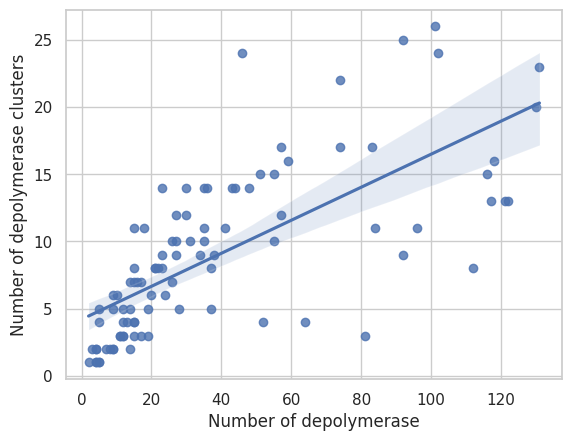

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Create a DataFrame from the coordinates
df = pd.DataFrame({'Number of depolymerase': count_n_depo, 'Number of depolymerase clusters': count_n_clusters})

# Plot the scatter plot with regression line
sns.regplot(x='Number of depolymerase', y='Number of depolymerase clusters', data=df)

# Calculate and display correlation coefficient and p-value
correlation_coef, p_value = pearsonr(count_n_depo, count_n_clusters)
print("Correlation coefficient (Pearson):", correlation_coef)
print("P-value:", p_value)

# Add labels and title
plt.xlabel('Number of depolymerase')
plt.ylabel('Number of depolymerase clusters')

# Show the plot
plt.show()

In [70]:
dico_n_depolymerase_cluster_detail["KL30"]

{'depo_clusters': ['Dpo_cdhit_739',
  'Dpo_cdhit_739',
  'Dpo_cdhit_739',
  'Dpo_cdhit_739',
  'Dpo_cdhit_842',
  'Dpo_cdhit_842',
  'Dpo_cdhit_842',
  'Dpo_cdhit_842',
  'Dpo_cdhit_842',
  'Dpo_cdhit_739',
  'Dpo_cdhit_842',
  'Dpo_cdhit_739',
  'Dpo_cdhit_946',
  'Dpo_cdhit_842',
  'Dpo_cdhit_739',
  'Dpo_cdhit_626',
  'Dpo_cdhit_594',
  'Dpo_cdhit_192',
  'Dpo_cdhit_795',
  'Dpo_cdhit_795',
  'Dpo_cdhit_910',
  'Dpo_cdhit_722',
  'Dpo_cdhit_275',
  'Dpo_cdhit_192',
  'Dpo_cdhit_470',
  'Dpo_cdhit_834',
  'Dpo_cdhit_883',
  'Dpo_cdhit_192',
  'Dpo_cdhit_795',
  'Dpo_cdhit_795',
  'Dpo_cdhit_795',
  'Dpo_cdhit_192',
  'Dpo_cdhit_910',
  'Dpo_cdhit_739',
  'Dpo_cdhit_948',
  'Dpo_cdhit_192',
  'Dpo_cdhit_192',
  'Dpo_cdhit_192',
  'Dpo_cdhit_175',
  'Dpo_cdhit_192',
  'Dpo_cdhit_622',
  'Dpo_cdhit_626',
  'Dpo_cdhit_192',
  'Dpo_cdhit_722',
  'Dpo_cdhit_844',
  'Dpo_cdhit_594',
  'Dpo_cdhit_910',
  'Dpo_cdhit_192',
  'Dpo_cdhit_722',
  'Dpo_cdhit_192',
  'Dpo_cdhit_278',
  'Dpo_cdhit_7

In [8]:
tropigat_predicted_kltypes = [kltypes for _, row in final_annotation_pertinent.iterrows() for kltypes in row["TropiGAT_KLtypes"].split(",") if kltypes != "0"]
tropiseq_predicted_kltypes = [kltypes for _, row in final_annotation_pertinent.iterrows() for kltypes in row["Tropiseq_KLtypes"].split(",") if kltypes != "0"]
kltypes = set(tropigat_predicted_kltypes + tropiseq_predicted_kltypes)

In [9]:
len(kltypes)

97

In [36]:
Counter(final_annotation_pertinent_tropiseq['depo_cluster'])

Counter({'Dpo_cdhit_774': 156,
         'Dpo_cdhit_175': 153,
         'Dpo_cdhit_368': 99,
         'Dpo_cdhit_260': 74,
         'Dpo_cdhit_837': 72,
         'Dpo_cdhit_327': 67,
         'Dpo_cdhit_291': 58,
         'Dpo_cdhit_796': 57,
         'Dpo_cdhit_406': 52,
         'Dpo_cdhit_192': 50,
         'Dpo_cdhit_472': 48,
         'Dpo_cdhit_334': 37,
         'Dpo_cdhit_936': 35,
         'Dpo_cdhit_462': 35,
         'Dpo_cdhit_580': 34,
         'Dpo_cdhit_739': 33,
         'Dpo_cdhit_319': 26,
         'Dpo_cdhit_275': 26,
         'Dpo_cdhit_331': 22,
         'Dpo_cdhit_447': 22,
         'Dpo_cdhit_689': 21,
         'Dpo_cdhit_663': 21,
         'Dpo_cdhit_184': 20,
         'Dpo_cdhit_882': 20,
         'Dpo_cdhit_316': 19,
         'Dpo_cdhit_120': 19,
         'Dpo_cdhit_673': 19,
         'Dpo_cdhit_336': 19,
         'Dpo_cdhit_361': 18,
         'Dpo_cdhit_182': 17,
         'Dpo_cdhit_137': 17,
         'Dpo_cdhit_49': 17,
         'Dpo_cdhit_358': 17,
         

In [13]:
final_annotation_pertinent_tropiseq = final_annotation_pertinent[final_annotation_pertinent["Tropiseq_KLtypes"] != "0"]
final_annotation_pertinent_tropigat = final_annotation_pertinent[final_annotation_pertinent["TropiGAT_KLtypes"] != "0"]


In [47]:
Counter(count_effectif)

Counter({1: 180,
         2: 115,
         3: 60,
         4: 31,
         5: 26,
         6: 20,
         7: 17,
         8: 15,
         12: 11,
         9: 8,
         13: 7,
         10: 7,
         14: 6,
         17: 5,
         16: 5,
         15: 4,
         11: 4,
         19: 4,
         20: 2,
         21: 2,
         35: 2,
         22: 2,
         26: 2,
         50: 1,
         33: 1,
         99: 1,
         58: 1,
         74: 1,
         52: 1,
         72: 1,
         67: 1,
         156: 1,
         153: 1,
         48: 1,
         57: 1,
         18: 1,
         34: 1,
         37: 1})

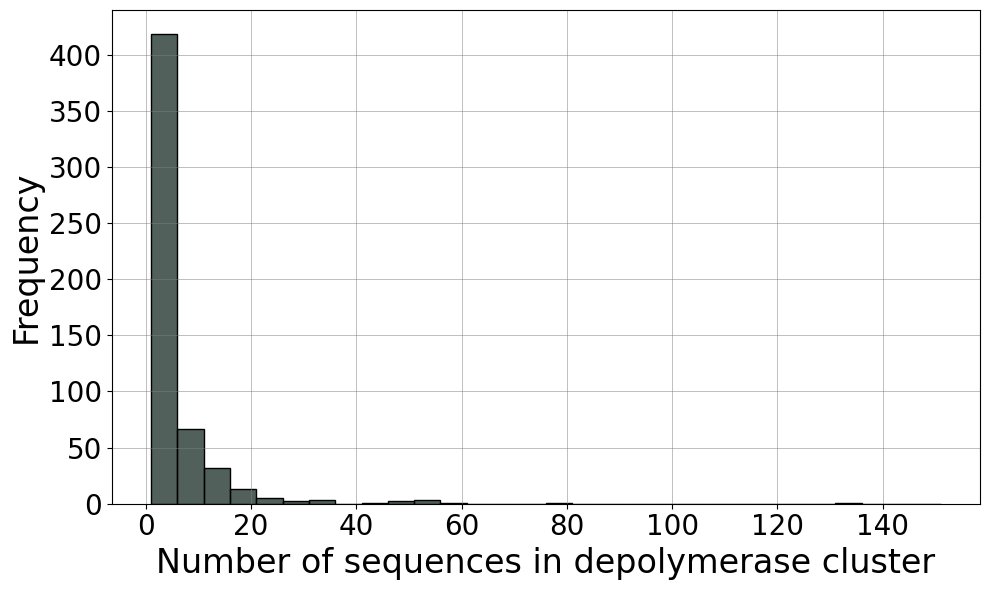

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming final_annotation_pertinent_tropiseq is your dataframe and 'depo_cluster' is the column of interest
count_effectif = [value for cluster, value in dict(Counter(final_annotation_pertinent_tropiseq['depo_cluster'])).items()]

plt.figure(figsize=(10, 6))

# Create the histogram with seaborn
sns.histplot(count_effectif, 
             bins=[i for i in range(min(count_effectif), max(count_effectif)+21, 5)], 
             color='#172b23f0')  # You can change the color here

# Set the title and labels for the plot
plt.title('')
plt.xlabel('Number of sequences in depolymerase cluster', fontsize=24)  # Adjust fontsize as needed
plt.ylabel('Frequency', fontsize=24)  # Adjust fontsize as needed

# Adjust tick font size
plt.xticks(fontsize=20)  # Adjust fontsize as needed
plt.yticks(fontsize=20)  # Adjust fontsize as needed

# Adjust layout to prevent cutting off labels
plt.tight_layout()
plt.grid(True, linestyle='-', alpha=0.7, color='gray', linewidth=0.5)

# Save the figure
plt.savefig(f"{path_work}/TropiSeq_cluster_size.1107.svg", format='svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [13]:
final_annotation_pertinent_tropiseq.drop_duplicates(subset = ["domain_seq"])

,index,seq,domain_seq,depo_cluster,Tropiseq_KLtypes,Tropiseq_scores,TropiGAT_KLtypes,TropiGAT_scores
3,minibatch__467,MNRSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEK...,RSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEKDV...,Dpo_cdhit_233,KL19,KL19 : 0.5020466042963604,KL19,"KL19,1.0,0.9360229969024658"
4,minibatch__15,MYHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNT...,YHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNTV...,Dpo_cdhit_280,KL25,KL25 : 0.5113381278515909,KL25,"KL25,1.0,0.9969082474708556"
6,minibatch__1900,MSTYKTKNPLGSAAVKDLYDNAENVDKFVNDRTKEELEDRLGVLRK...,STYKTKNPLGSAAVKDLYDNAENVDKFVNDRTKEELEDRLGVLRKT...,Dpo_cdhit_32,KL123,KL123 : 0.5939826590887848,0,0
7,minibatch__91,MQYLYVDPSDDENKPIPSAFKTVTAAIAAITSYPFSILIRRGTILK...,MQYLYVDPSDDENKPIPSAFKTVTAAIAAITSYPFSILIRRGTILK...,Dpo_cdhit_182,KL15,KL15 : 0.7938890377524203,KL15,"KL15,1.0,0.9968655705451964"
8,minibatch__840,MTITETQKTAQLAADAAVSAAEAKQYMLEAEKGYQDTSAAAQQAQD...,TETQKTAQLAADAAVSAAEAKQYMLEAEKGYQDTSAAAQQAQDAAG...,Dpo_cdhit_453,KL16,KL16 : 0.5752871838710885,0,0
...,...,...,...,...,...,...,...,...
3912,anubis_return__4216,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,Dpo_cdhit_226,"KL46,KL149","KL46 : 0.9163233501874942,KL149 : 0.6497543628...",KL149,"KL149,1.0,0.8127290606498718"
3913,anubis_return__4239,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,Dpo_cdhit_689,"KL51,KL141,KL117","KL51 : 0.6835463433012764,KL141 : 0.5468976663...",0,0
3914,anubis_return__4260,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,Dpo_cdhit_778,KL57,KL57 : 0.9884944684944685,0,0
3915,anubis_return__4275,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,Dpo_cdhit_918,KL9,KL9 : 0.697289307294887,KL9,"KL9,1.0,0.954328954219818"


In [10]:
multiple_kltype = []

final_annotation_pertinent_tropigat[final_annotation_pertinent_tropigat['TropiGAT_KLtypes'].str.split(",").apply(len) > 1].drop_duplicates(subset = ["domain_seq"])

,index,seq,domain_seq,depo_cluster,Tropiseq_KLtypes,Tropiseq_scores,TropiGAT_KLtypes,TropiGAT_scores
27,minibatch__419,MTRLPESSLWEEEIELISRSERVSGGLDGVANRPLKSLANRTRYLK...,RLPESSLWEEEIELISRSERVSGGLDGVANRPLKSLANRTRYLKDR...,Dpo_cdhit_86,"KL24,KL28","KL24 : 0.6864301060313933,KL28 : 0.77915096194...","KL28,KL24","KL28,1.0,0.9941917061805724;KL24,1.0,0.9051105..."
140,ppt__75,MNKKIIFLIIALTVTFSNKGLSFERGVCAHFDSYSEDPVVYLKALK...,MNKKIIFLIIALTVTFSNKGLSFERGVCAHFDSYSEDPVVYLKALK...,Dpo_cdhit_618,KL24,KL24 : 0.8941957614923483,"KL112,KL24","KL112,1.0,0.9590400457382202;KL24,1.0,0.993960..."
141,ppt__85,MADINESPLWEDVIELIGRTERVSGGQDGVANRPLKKLANRTRYLK...,MADINESPLWEDVIELIGRTERVSGGQDGVANRPLKKLANRTRYLK...,Dpo_cdhit_71,"KL112,KL48,KL39,KL8,KL21,KL24,KL28","KL112 : 0.7797781306684983,KL48 : 0.5854146520...","KL25,KL48,KL21,KL39,KL28,KL112,KL24","KL25,1.0,0.8864821791648865;KL48,1.0,0.8759772..."
143,ppt__110,MEHHSGDFSVTVRDVRQLTQPESDLLTLLWVLEGSVNLAVAEGASQ...,HSGDFSVTVRDVRQLTQPESDLLTLLWVLEGSVNLAVAEGASQPLA...,Dpo_cdhit_41,"KL64,KL74","KL64 : 0.7042461675673053,KL74 : 0.54712876852...","KL106,KL74,KL10","KL106,1.0,0.9647884368896484;KL74,1.0,0.941522..."
148,ppt__201,MIKQSPKYITPLNEQNVNKDNANLLVCPFAGASNSAFNSWRSTDIS...,MIKQSPKYITPLNEQNVNKDNANLLVCPFAGASNSAFNSWRSTDIS...,Dpo_cdhit_832,"KL62,KL107,KL51,KL24","KL62 : 0.6168586181967486,KL107 : 0.9204329031...","KL107,KL51,KL24","KL107,1.0,0.981014609336853;KL51,1.0,0.8609442..."
...,...,...,...,...,...,...,...,...
3782,anubis_return__2063,MAETKSQQSRLLVTLTALFAAFCGLYLLIGGAWLVVLGGSWYYPIA...,PAAPISNVADGDWPAYGRNQEGQRFSPLKQINADNVKNLKEAWVFR...,Dpo_cdhit_102,"KL8,KL143,KL9,KL14,KL70,KL31","KL8 : 0.9785553047404063,KL143 : 0.91956882255...","KL1,KL14","KL1,1.0,0.9968929290771484;KL14,1.0,0.87449908..."
3809,anubis_return__2369,MSYKNWHAYQEATAKVFRDLGCNAQIDFRTKGARATHDIDVYATFF...,TALAAASEVPLILNSSGEGEPIYQFPNLAGPHDLLLYNNVIISANW...,Dpo_cdhit_514,KL46,KL46 : 0.9163714565158562,"KL46,KL1","KL46,1.0,0.8887879252433777;KL1,1.0,0.99588340..."
3819,anubis_return__2623,MRPIPLLLILSALALPALSQAAVRVEVLQNRLAHPWGLAFLPDDQG...,LALPALSQAAVRVEVLQNRLAHPWGLAFLPDDQGMLITLRGGELKR...,Dpo_cdhit_524,"KL81,KL67,KL60,KL8,KL126","KL81 : 0.6014862574863522,KL67 : 0.85596865699...","KL38,KL60","KL38,1.0,0.999990701675415;KL60,1.0,0.98078852..."
3822,anubis_return__2670,MNGLNHNALTCSAVPIPPWERPLQTVEAQPYFNVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERPLQTVEAQPYFNVSQASLVLEGIVF...,Dpo_cdhit_689,"KL51,KL141,KL117","KL51 : 0.6835463433012764,KL141 : 0.5468976663...","KL81,KL10","KL81,1.0,0.9952770471572876;KL10,1.0,0.9676401..."


In [96]:
82/1761

0.04656445201590006

In [93]:
550/989


0.5561172901921132

In [11]:
final_annotation_pertinent_tropiseq.drop_duplicates(subset = ["depo_cluster"])

,index,seq,domain_seq,depo_cluster,Tropiseq_KLtypes,Tropiseq_scores,TropiGAT_KLtypes,TropiGAT_scores
3,minibatch__467,MNRSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEK...,RSRRLLMRGIGYLTLFPLLFLFSKKVSSAPNGLTEKVKNRKIEKDV...,Dpo_cdhit_233,KL19,KL19 : 0.5020466042963604,KL19,"KL19,1.0,0.9360229969024658"
4,minibatch__15,MYHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNT...,YHLDNTSGVPEMPEPKEQQSISPRWFGESQEQGGISWPGADWFNTV...,Dpo_cdhit_280,KL25,KL25 : 0.5113381278515909,KL25,"KL25,1.0,0.9969082474708556"
6,minibatch__1900,MSTYKTKNPLGSAAVKDLYDNAENVDKFVNDRTKEELEDRLGVLRK...,STYKTKNPLGSAAVKDLYDNAENVDKFVNDRTKEELEDRLGVLRKT...,Dpo_cdhit_32,KL123,KL123 : 0.5939826590887848,0,0
7,minibatch__91,MQYLYVDPSDDENKPIPSAFKTVTAAIAAITSYPFSILIRRGTILK...,MQYLYVDPSDDENKPIPSAFKTVTAAIAAITSYPFSILIRRGTILK...,Dpo_cdhit_182,KL15,KL15 : 0.7938890377524203,KL15,"KL15,1.0,0.9968655705451964"
8,minibatch__840,MTITETQKTAQLAADAAVSAAEAKQYMLEAEKGYQDTSAAAQQAQD...,TETQKTAQLAADAAVSAAEAKQYMLEAEKGYQDTSAAAQQAQDAAG...,Dpo_cdhit_453,KL16,KL16 : 0.5752871838710885,0,0
...,...,...,...,...,...,...,...,...
3856,anubis_return__3359,MSDLAREITPVNIEEELKSSYLDYAMSVIVGRALPDVRDGLKPVHR...,EELELVREQFGDARRTEITANSADINIEDLINQEDVVVTLSHQGYV...,Dpo_cdhit_578,"KL2,KL29","KL2 : 0.5041892646811488,KL29 : 1.0",0,0
3870,anubis_return__3542,MTTYKTGNPLGSAAVKDLFDNAENLDHFENDRSNETWENRFGVPGK...,QGMWNSQVTGVSNNLRLAQYGSTDKVGAYGDIAGTIQKAYQAPLPA...,Dpo_cdhit_767,KL105,KL105 : 0.9160828363426899,KL105,"KL105,1.0,0.9703969359397888"
3878,anubis_return__3729,HIEHYGNAEAQAYQDSVSSGVTVWSSCHAWGGGLHSGEKINCLNTD...,HIEHYGNAEAQAYQDSVSSGVTVWSSCHAWGGGLHSGEKINCLNTD...,Dpo_cdhit_889,KL126,KL126 : 1.0,0,0
3914,anubis_return__4260,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,Dpo_cdhit_778,KL57,KL57 : 0.9884944684944685,0,0


In [14]:
final_annotation_pertinent_tropiseq[final_annotation_pertinent_tropiseq['Tropiseq_KLtypes'].str.split(",").apply(len) > 1].drop_duplicates(subset = ["depo_cluster"])

,index,seq,domain_seq,depo_cluster,Tropiseq_KLtypes,Tropiseq_scores,TropiGAT_KLtypes,TropiGAT_scores
12,minibatch__669,MANIEKLGSSSPEVLLKNATNLDKLVNGRESESLPDRFGVLRKTWH...,ANIEKLGSSSPEVLLKNATNLDKLVNGRESESLPDRFGVLRKTWHG...,Dpo_cdhit_74,"KL10,KL28","KL10 : 0.5240114964736252,KL28 : 0.71721686653...",0,0
27,minibatch__419,MTRLPESSLWEEEIELISRSERVSGGLDGVANRPLKSLANRTRYLK...,RLPESSLWEEEIELISRSERVSGGLDGVANRPLKSLANRTRYLKDR...,Dpo_cdhit_86,"KL24,KL28","KL24 : 0.6864301060313933,KL28 : 0.77915096194...","KL28,KL24","KL28,1.0,0.9941917061805724;KL24,1.0,0.9051105..."
29,minibatch__1796,MFGYLHGVSPDAVPYYQKAVDEGHARGLPVQLTGKYYATTYPHKVT...,FGYLHGVSPDAVPYYQKAVDEGHARGLPVQLTGKYYATTYPHKVTL...,Dpo_cdhit_179,"KL37,KL145","KL37 : 0.8983974358974358,KL145 : 0.9328125",0,0
58,minibatch__42,MGDALLAVKQPYTGAVARTQHDKNWDSINLLDFVYATDVVDGFVDY...,GDALLAVKQPYTGAVARTQHDKNWDSINLLDFVYATDVVDGFVDYG...,Dpo_cdhit_192,"KL30,KL23,KL28","KL30 : 0.5181941305766264,KL23 : 0.60560978521...",0,0
72,minibatch__600,MGQCSSLADLRGVEFLSTGQQIFLREHTAGQGMGGGIWYCHSMIND...,MGQCSSLADLRGVEFLSTGQQIFLREHTAGQGMGGGIWYCHSMIND...,Dpo_cdhit_142,"KL110,KL24","KL110 : 0.5331845337632967,KL24 : 0.5985419595...",0,0
...,...,...,...,...,...,...,...,...
3686,anubis_return__532,MAETKSQQSRLLVTLTALFAAFCGLYLLIGGAWLVVLGGSWYYPIA...,ATPAAPISTVADGDWPAYGRNQEGQRFSPLKQINADNVKNLKEAWV...,Dpo_cdhit_102,"KL8,KL143,KL9,KL14,KL70,KL31","KL8 : 0.9785553047404063,KL143 : 0.91956882255...",KL1,"KL1,1.0,0.996148943901062"
3694,anubis_return__595,MRPIPLLLLLSALSLPALSQAAARVEVLQNRLAHPWSLAFLPGDQG...,LSLPALSQAAARVEVLQNRLAHPWSLAFLPGDQGMLITLRGGELKR...,Dpo_cdhit_524,"KL81,KL67,KL60,KL8,KL126","KL81 : 0.6014862574863522,KL67 : 0.85596865699...",KL48,"KL48,1.0,0.9901483654975892"
3697,anubis_return__667,MYHLDNTSGVPEMPEPKETQTISTRWFGESQEQGGISWPGADWFNI...,AFTAWETPEGPFVITSRCAKLNGEGKLYHGTVNTSTRVERITIRDC...,Dpo_cdhit_297,"KL25,KL136","KL25 : 0.8377605813541803,KL136 : 0.5298351541...",0,0
3712,anubis_return__898,MKQKSLYIAIVLALHCAVAVADNSIDSTQIDEVTVNGDGNNISGLT...,LHCAVAVADNSIDSTQIDEVTVNGDGNNISGLTPCATPSNCKSPLG...,Dpo_cdhit_803,"KL45,KL64,KL46","KL45 : 0.8730790855774717,KL64 : 0.51934892861...","KL30,KL43,KL45","KL30,1.0,0.8741915225982666;KL43,1.0,0.9725573..."


In [56]:
dico_sequences_consensus_annot = defaultdict(list)

for KL_type in tqdm(kltypes) :
    for _,row in final_annotation_pertinent.iterrows() :
        if KL_type in row["Tropiseq_KLtypes"].split(",") and KL_type in row["TropiGAT_KLtypes"].split(",") :
            dico_sequences_consensus_annot[KL_type].append(row["domain_seq"])
    

100%|███████████████████████████████████████████| 97/97 [00:12<00:00,  7.92it/s]


In [58]:
for kltype in dico_sequences_consensus_annot :
    print(kltype, len(dico_sequences_consensus_annot[kltype]))

KL112 3
KL17 95
KL107 65
KL127 12
KL51 18
KL108 6
KL122 1
KL102 94
KL123 10
KL14 80
KL22 29
KL57 17
KL114 14
KL149 17
KL8 11
KL19 21
KL39 3
KL81 13
KL53 28
KL60 13
KL1 5
KL45 24
KL74 41
KL9 12
KL55 2
KL63 39
KL136 11
KL128 14
KL118 13
KL10 28
KL43 13
KL25 71
KL110 30
KL7 20
KL151 8
KL48 2
KL21 22
KL29 16
KL24 44
KL18 13
KL12 20
KL27 52
KL47 32
KL2 22
KL145 9
KL13 16
KL34 16
KL62 45
KL46 48
KL16 10
KL116 13
KL36 12
KL23 35
KL52 15
KL105 35
KL169 5
KL111 21
KL70 12
KL30 21
KL106 45
KL3 40
KL15 25
KL38 10
KL28 38
KL64 42
KL5 8


In [64]:
set_consensus_seq = set([seq for kltype in dico_sequences_consensus_annot for seq in dico_sequences_consensus_annot[kltype]])
len(set_consensus_seq)

1423

***
### Determine the pairs of KL types : 

In [18]:
from itertools import combinations

def generate_pairs(input_set):
    """
    Generate all possible pairs of elements from the input set.
    Args:
    input_set (set): A set of elements.
    Returns:
    list of sets: A list containing sets of all possible pairs.
    """
    return [set(pair) for pair in combinations(input_set, 2)]

def count_sets(list_of_sets):
    """
    Count occurrences of unique sets in a list of sets.
    Args:
    list_of_sets (list of sets): A list containing sets.
    Returns:
    Counter: A Counter object with counts of each unique set (converted to tuple).
    """
    # Convert each set to a tuple
    tuples = [tuple(sorted(s)) for s in list_of_sets]
    # Use Counter to count occurrences
    return Counter(tuples)

In [16]:
tropiseq_multitarget_clusters = final_annotation_pertinent_tropiseq[final_annotation_pertinent_tropiseq['Tropiseq_KLtypes'].str.split(",").apply(len) > 1].drop_duplicates(subset = ["depo_cluster"])

In [17]:
tropiseq_multitarget_clusters

,index,seq,domain_seq,depo_cluster,Tropiseq_KLtypes,Tropiseq_scores,TropiGAT_KLtypes,TropiGAT_scores
12,minibatch__669,MANIEKLGSSSPEVLLKNATNLDKLVNGRESESLPDRFGVLRKTWH...,ANIEKLGSSSPEVLLKNATNLDKLVNGRESESLPDRFGVLRKTWHG...,Dpo_cdhit_74,"KL10,KL28","KL10 : 0.5240114964736252,KL28 : 0.71721686653...",0,0
27,minibatch__419,MTRLPESSLWEEEIELISRSERVSGGLDGVANRPLKSLANRTRYLK...,RLPESSLWEEEIELISRSERVSGGLDGVANRPLKSLANRTRYLKDR...,Dpo_cdhit_86,"KL24,KL28","KL24 : 0.6864301060313933,KL28 : 0.77915096194...","KL28,KL24","KL28,1.0,0.9941917061805724;KL24,1.0,0.9051105..."
29,minibatch__1796,MFGYLHGVSPDAVPYYQKAVDEGHARGLPVQLTGKYYATTYPHKVT...,FGYLHGVSPDAVPYYQKAVDEGHARGLPVQLTGKYYATTYPHKVTL...,Dpo_cdhit_179,"KL37,KL145","KL37 : 0.8983974358974358,KL145 : 0.9328125",0,0
58,minibatch__42,MGDALLAVKQPYTGAVARTQHDKNWDSINLLDFVYATDVVDGFVDY...,GDALLAVKQPYTGAVARTQHDKNWDSINLLDFVYATDVVDGFVDYG...,Dpo_cdhit_192,"KL30,KL23,KL28","KL30 : 0.5181941305766264,KL23 : 0.60560978521...",0,0
72,minibatch__600,MGQCSSLADLRGVEFLSTGQQIFLREHTAGQGMGGGIWYCHSMIND...,MGQCSSLADLRGVEFLSTGQQIFLREHTAGQGMGGGIWYCHSMIND...,Dpo_cdhit_142,"KL110,KL24","KL110 : 0.5331845337632967,KL24 : 0.5985419595...",0,0
...,...,...,...,...,...,...,...,...
3686,anubis_return__532,MAETKSQQSRLLVTLTALFAAFCGLYLLIGGAWLVVLGGSWYYPIA...,ATPAAPISTVADGDWPAYGRNQEGQRFSPLKQINADNVKNLKEAWV...,Dpo_cdhit_102,"KL8,KL143,KL9,KL14,KL70,KL31","KL8 : 0.9785553047404063,KL143 : 0.91956882255...",KL1,"KL1,1.0,0.996148943901062"
3694,anubis_return__595,MRPIPLLLLLSALSLPALSQAAARVEVLQNRLAHPWSLAFLPGDQG...,LSLPALSQAAARVEVLQNRLAHPWSLAFLPGDQGMLITLRGGELKR...,Dpo_cdhit_524,"KL81,KL67,KL60,KL8,KL126","KL81 : 0.6014862574863522,KL67 : 0.85596865699...",KL48,"KL48,1.0,0.9901483654975892"
3697,anubis_return__667,MYHLDNTSGVPEMPEPKETQTISTRWFGESQEQGGISWPGADWFNI...,AFTAWETPEGPFVITSRCAKLNGEGKLYHGTVNTSTRVERITIRDC...,Dpo_cdhit_297,"KL25,KL136","KL25 : 0.8377605813541803,KL136 : 0.5298351541...",0,0
3712,anubis_return__898,MKQKSLYIAIVLALHCAVAVADNSIDSTQIDEVTVNGDGNNISGLT...,LHCAVAVADNSIDSTQIDEVTVNGDGNNISGLTPCATPSNCKSPLG...,Dpo_cdhit_803,"KL45,KL64,KL46","KL45 : 0.8730790855774717,KL64 : 0.51934892861...","KL30,KL43,KL45","KL30,1.0,0.8741915225982666;KL43,1.0,0.9725573..."


In [21]:
tropiseq_combinations = []

for _,row in tropiseq_multitarget_clusters.iterrows() :
    kltypes_set = set(row["Tropiseq_KLtypes"].split(","))
    combi = generate_pairs(kltypes_set)
    tropiseq_combinations = tropiseq_combinations + combi


Count_sets = count_sets(tropiseq_combinations)
    

In [22]:
Count_sets

Counter({('KL106', 'KL107'): 7,
         ('KL47', 'KL64'): 5,
         ('KL2', 'KL51'): 4,
         ('KL107', 'KL15'): 4,
         ('KL106', 'KL15'): 4,
         ('KL22', 'KL37'): 4,
         ('KL24', 'KL51'): 3,
         ('KL107', 'KL24'): 3,
         ('KL2', 'KL64'): 3,
         ('KL24', 'KL64'): 3,
         ('KL16', 'KL51'): 3,
         ('KL105', 'KL47'): 3,
         ('KL15', 'KL36'): 3,
         ('KL105', 'KL107'): 3,
         ('KL107', 'KL36'): 3,
         ('KL105', 'KL106'): 3,
         ('KL106', 'KL36'): 3,
         ('KL21', 'KL35'): 3,
         ('KL34', 'KL53'): 3,
         ('KL24', 'KL28'): 2,
         ('KL23', 'KL30'): 2,
         ('KL34', 'KL61'): 2,
         ('KL57', 'KL61'): 2,
         ('KL34', 'KL57'): 2,
         ('KL113', 'KL2'): 2,
         ('KL113', 'KL114'): 2,
         ('KL113', 'KL51'): 2,
         ('KL112', 'KL24'): 2,
         ('KL21', 'KL24'): 2,
         ('KL107', 'KL51'): 2,
         ('KL17', 'KL30'): 2,
         ('KL14', 'KL64'): 2,
         ('KL53', 'KL60')

***
### Plot the depolymerase clusters TropiSEQ :

In [23]:
DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df_v2.filtered.tsv", sep = "\t" ,  header = 0)
DF_info_lvl_0 = DF_info.copy()
df_prophages = DF_info_lvl_0.drop_duplicates(subset = ["Phage"])
dico_prophage_count = dict(Counter(df_prophages["KL_type_LCA"]))



In [24]:
DF_info

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_902164905.1__phage1,GCF_902164905.1__phage1__34,KL41,GCF_902164905.1,minibatch__460,minibatch,MPATPQDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDE...,QDRLYGLTTSVAVKPPVFISVDYDVARFGEQTITSKTPTDERTITT...,0.025276,0.053137,...,-0.011464,0.081105,0.012011,0.042917,0.009402,0.093175,-0.080562,0.000897,0.111854,prophage_11309
1,GCF_017310305.1__phage5,GCF_017310305.1__phage5__1353,KL30,n4996,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
2,GCF_001701985.1__phage2,GCF_001701985.1__phage2__357,KL30,n4988,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_6465
3,GCF_001611095.1__phage5,GCF_001611095.1__phage5__1365,KL30,n49894989,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_5
4,GCF_902156555.1__phage3,GCF_902156555.1__phage3__511,KL30,GCF_902156555.1,minibatch__1084,minibatch,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVT...,VSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTMDTSENIVTLT...,0.004905,0.040896,...,-0.040657,0.087288,0.022292,0.024434,0.025246,0.083449,-0.123537,0.047648,0.061250,prophage_1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11462,GCF_900506765.1__phage17,GCF_900506765.1__phage17__90,KL149,GCF_900506765.1,anubis_return__4216,anubis_return,MMTTLNEHPQWESDIYLIKRSDLVAGGRGGIANMQAQQLANRTAFL...,NRRWFRRFTGNIRAEWSGIHDLSQSSAPVDSYIYRLLLASAVGSPD...,0.053704,0.083858,...,0.032803,0.109572,0.010032,0.024949,0.094129,0.028693,-0.061396,0.006824,0.046220,prophage_15598
11463,GCF_003255785.1__phage1,GCF_003255785.1__phage1__10,KL127,GCF_003255785.1,anubis_return__4239,anubis_return,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,MNGLNHNALTCSAVPIPPWERSLQTVEAQPYFSVSQASLVLEGIVF...,0.010626,-0.025389,...,0.045372,0.009262,-0.008319,-0.050856,0.034115,0.101663,-0.108278,-0.135629,0.102486,prophage_3577
11464,GCF_002186895.1__phage9,GCF_002186895.1__phage9__5,KL57,GCF_002186895.1,anubis_return__4260,anubis_return,MRYRFIALALCLLSGSKVAISAGFDCSLANLSPTEKTICSNEYLSG...,ITDSPWLVKKIFSSDSFEGGINLEGMNVSSILTYQEIKNDLYIYIS...,0.073450,0.046651,...,0.035302,0.012151,0.003563,-0.022575,0.014130,0.063376,-0.050646,-0.085156,-0.010849,prophage_6002
11465,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656


In [ ]:
final_annotation_pertinent_tropiseq